JUPYTER NOTEBOOK CREATED BY MARIO EMMANUEL RODRIGUEZ TREJO 

CAPSTONE PROJECT OF IBM DATA SCIENCE COURSE. 

BACKGROUND-------------------------------


Mexico occupies the eighth place among the tourist destinations visited in the world (UNWTO, 2016), Quintana Roo holding the first place in the tourism industry in the country. On the other hand, small and medium enterprises or SMES in Mexico bring around 72% of the jobs, and get an approximate of 52% of the Gross Domestic Product (GDP) of the country (CONDUSEF, 2019), and for Quintana Roo the GDP contribution from SMES to the state is about 83% (Canirac, 2014). However, the bankruptcy index of SMES grows up to 80% after 5 years of operations (El Universal, 2016) which can be explained by many factors of failures. In Quintana Roo, the sector that has more participation in the GDP is the "food and beverages" SMES with a contribution of 21.3% in the state (INEGI,2014). According to the UNWTO, the city that gives more GDP among others is Cancun with 7.1% (La Jornada Maya, 2018).

Problem  

The relevance of Tourism industry in Cancún in regards of SMES concern has worried local and foreign stakeholders on how to invest properly in this region. According to a diagnosis proposal tool for SMES of "Food and beverages"(Hernandez L., et. al, 2018), a strategic factor that could endure the life cycle of the companies is the location. 
Machine Learning (ML) algorithms have improved the way of how to analyze information and take decisions. For example, Google Analytics can classify the segmentation of clients that are more likely to buy a certain product with ML algorithms. Then, ML algorithms could have the capacity to recognize by clusters the kind of businesses that are in a certain region given their own information and the places that are around.

Interest

Therefore, in the presented capstone project, clusters of the most popular restaurants in Cancun are going to be defined as a result of a ML algorithm, so that investors or market researches can take a decision or review options to take into account from the results.


DATA DESCRIPTION-------------------------

The data that is about to be used is the dataset of the top 100 restaurants obtained from Trip Advisor's website with its category of restaurant, the position in the website in Cancun, the category of price level (\\$=Low,\\$\\$-\\$\\$\\$=Medium,\\$\\$\\$\\$=High), and the GPS coordinates. All of the mentioned data was obtained from tripadvisor webpage, where the last update of the positions of the top 100 was on May 11th of 2019. The way of obtaining the CSV document of the dataset was manually copied from the inspected data of the webpage of each restaurant. The reason that web scrapping was not used was that the I do not know if Trip advisor will use spontaneously a different HTML structure. Therefore, I preferred to download quickly the data I needed by doing it manually.


In [1]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis
import re #import library to use regular expressions
import json # library to handle JSON files
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # use in case that it has not beeen installed folium
#!conda install -c conda-forge geopy --yes # use in case that it has not beeen installed geopy

import folium # map rendering library
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values
import requests # library to handle requests
import random # library for random number generation, in case that need for nandom ranges of numbers.

In [2]:
import chardet #helps to find which encoding to use for my CSV file.
with open('TOP100_one.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large
    
TOP_df=pd.read_csv('TOP100_one.csv', encoding=result['encoding'])#Df with the categories of restaurants in columns
TOP_dfvres=pd.read_csv('TOP100Res.csv', encoding=result['encoding'])#Df with the categories of restaurants in one column
#Created dataframe of the top 100 restaurants in cancun


In [3]:
print(TOP_dfvres.shape)
TOP_dfvres.head()

(100, 6)


,Top,Restaurant,Longitude,Latitude,Price_RgLv,Category
0,1,Sakura Sunset,21.053990,-86.781944,High,"Japonesa, Peruana, Mariscos, Asiática, Fusión,..."
1,2,Restaurante Careyes,21.083757,-86.772370,High,"Fusión, Mariscos, Apto para vegetarianos, Opci..."
2,3,Restaurante Benazuza,21.078350,-86.774950,High,"Apto para vegetarianos, Opciones veganas, Opci..."
3,4,Tora Cancún,21.086130,-86.773790,High,"Japonesa, Mariscos, Internacional, Sushi, Asiá..."
4,5,The White Box,21.144170,-86.785180,High,"Mariscos, Apto para vegetarianos, Opciones veg..."


In [4]:
print(TOP_df.shape)
TOP_df.head()

(100, 41)


,Top,Restaurant,Longitude,Latitude,Price_RgLv,Apto para vegetarianos,Argentina,Asiática,Bar,Brasilera,...,Opciones sin gluten,Opciones veganas,Parrilla,Peruana,Pizzería,Sopas,Sudamericana,Suiza,Sushi,Tailandesa
0,1,Sakura Sunset,21.053990,-86.781944,High,1,0,1,0,0,...,1,1,0,1,0,0,0,0,0,0
1,2,Restaurante Careyes,21.083757,-86.772370,High,0,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0
2,3,Restaurante Benazuza,21.078350,-86.774950,High,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,Tora Cancún,21.086130,-86.773790,High,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0
4,5,The White Box,21.144170,-86.785180,High,1,0,0,0,0,...,1,1,0,0,0,0,0,0,0,0


In [5]:
#Create a table the unique values of the cateogries of the level of the prices 
df_u=pd.DataFrame(TOP_df.Price_RgLv.value_counts(),TOP_df.Price_RgLv.unique())
df_u.index.name = 'Lv. of the Price'
df_u

,Price_RgLv
Lv. of the Price,
High,42
Medium,49
low,9


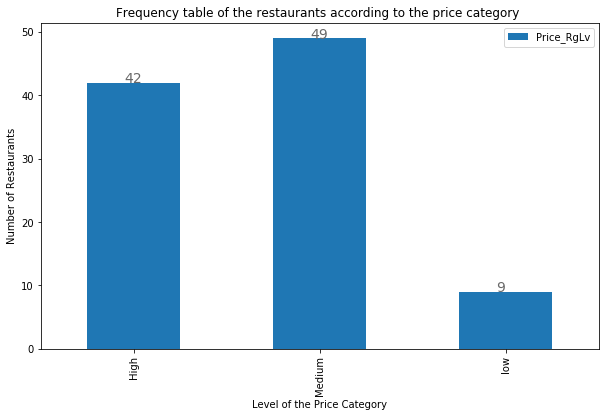

In [6]:
# Create a plot of columns of the category of the level of the prices.

ax=df_u.plot(kind='bar', figsize=(10, 6))

plt.xlabel('Level of the Price Category') # add to x-label to the plot
plt.ylabel('Number of Restaurants') # add y-label to the plot
plt.title('Frequency table of the restaurants according to the price category ') # add title to the plot
for i in ax.patches:
    # get_x pulls left or right; get_height pushes up or down
    ax.text(i.get_x()+.2, i.get_height()+.01, \
            str(round((i.get_height()), 2)), fontsize=14,
                color='dimgrey')
plt.show()

In [7]:
df_restc = TOP_df# get restaruant categories that are already in one hot encoding df
df_restc=df_restc.drop(["Top","Restaurant",'Longitude', 'Latitude',"Price_RgLv"], axis=1)
df_restc1=df_restc.sum(axis=0)
df_restc1

Apto para vegetarianos    84
Argentina                  3
Asiática                   8
Bar                        9
Brasilera                  2
Canadiense                 1
Caribeña                  11
Centroamericana            2
Cervecería                 2
Churrasquería              5
Comida rápida              2
Contemporánea              7
De la India                1
Del sudoeste de EE.UU      1
Española                   4
Estadounidense             7
Europea                   10
Francesa                   3
Fusión                     7
Internacional             19
Italiana                  17
Japonesa                   7
Latina                    19
Mariscos                  29
Mediterránea               2
Mexicana                  43
Opciones sin gluten       69
Opciones veganas          64
Parrilla                   3
Peruana                    2
Pizzería                   6
Sopas                      3
Sudamericana               1
Suiza                      1
Sushi         

In [8]:
#Explore the Restaurant frequencies 
df_h=pd.DataFrame(df_restc1)
df_h.columns=["Num_rest"]
df_h.index.name = 'Restaurant Category'
#Filter in a descendant order.
df_h=df_h.sort_values(by='Num_rest', ascending=False)

df_h.head()
#Get the % of the frequencies of each venue from the total of the venues obtained.

,Num_rest
Restaurant Category,
Apto para vegetarianos,84
Opciones sin gluten,69
Opciones veganas,64
Mexicana,43
Mariscos,29


In [9]:
print(df_h.shape)
df_h.head()

(36, 1)


,Num_rest
Restaurant Category,
Apto para vegetarianos,84
Opciones sin gluten,69
Opciones veganas,64
Mexicana,43
Mariscos,29


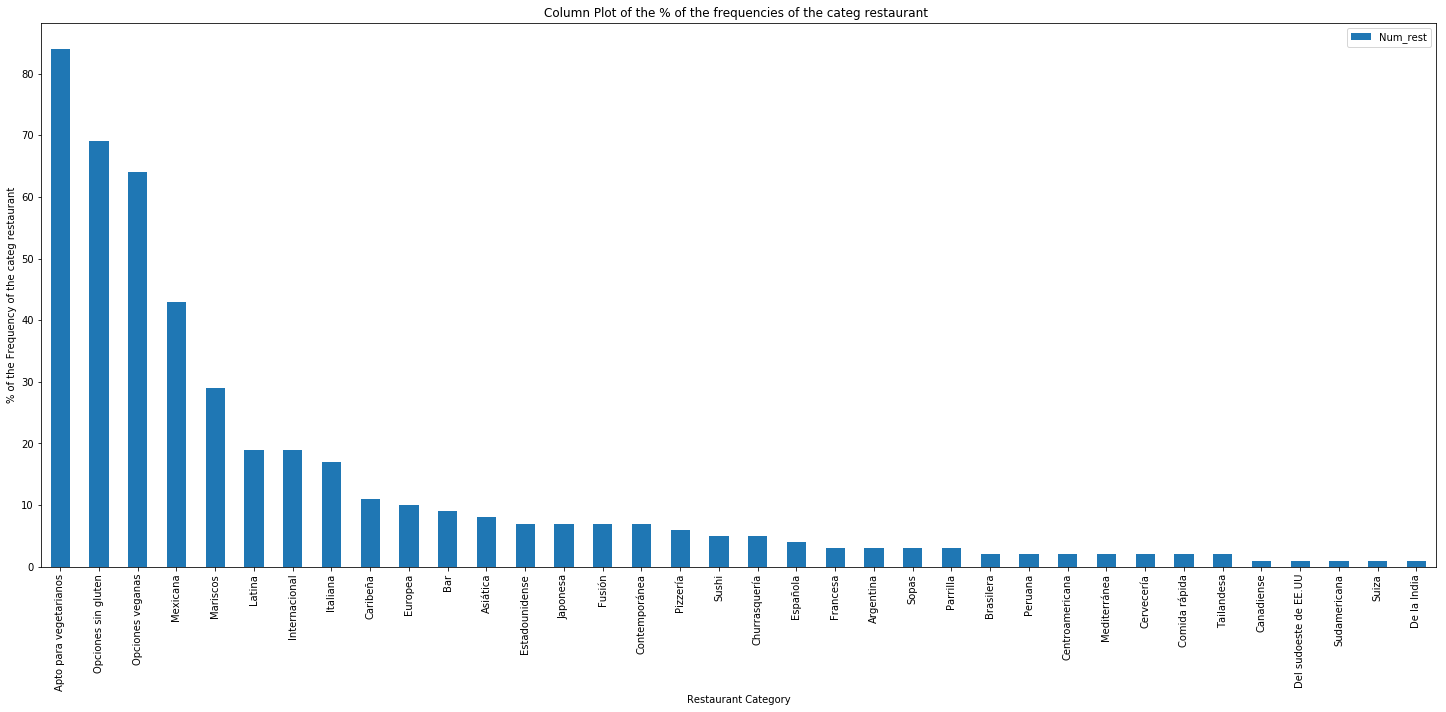

In [10]:
ay=df_h.plot(kind='bar', figsize=(25, 10))

plt.xlabel('Restaurant Category') # add to x-label to the plot
plt.ylabel('% of the Frequency of the categ restaurant') # add y-label to the plot
plt.title('Column Plot of the % of the frequencies of the categ restaurant ') # add title to the plot


plt.show()

In [11]:
#Plot cancun city and the Top 100 restaurants locations
address = 'Cancun, Quintana Roo'

geolocator = Nominatim(user_agent="ny_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Cancun are {}, {}.'.format(latitude, longitude))
# create map of New York using latitude and longitude values
map_cun = folium.Map(location=[latitude, longitude], zoom_start=11)

for lat, lng, Restaurant, Price_cat, Top in zip(TOP_df['Latitude'], TOP_df['Longitude'], TOP_df['Restaurant'], TOP_df['Price_RgLv'], TOP_df['Top']):
    label = '{}, {}, {}'.format(Top, Restaurant, Price_cat)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lng, lat],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cun)  


map_cun

The geograpical coordinates of Cancun are 21.1617854, -86.8510468.


In [12]:
#Set up credentials for FOURSQUARE API 
CLIENT_ID = '5ZIMNGRSMEXXD1J1FRLU4IMIN52QT3K25FKGOTJQQU3YUR3K' # your Foursquare ID
CLIENT_SECRET = '5LNSVPCBXN2E4Z0KDRYT5YFHJVM0IRD4WXAFQ4TUWWVNLMGW' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

In [26]:
#Create an automate funtion that obtain the data of the 30 venues that are around of each restaurants with a maxium of 500m of distance of radious.
def getNearbyVenues(names, latitudes, longitudes, radius=500,LIMIT=30):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        
        try:
            venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])
        except:
            continue

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Restaurant', 
                  'Restaurant Latitude', 
                  'Restaurant Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue_Category']
    
    return(nearby_venues)

In [27]:
#Use the previous function with the info. the Top 100 restaurants and save it in a new Data Frame
TOP_venues = getNearbyVenues(names=TOP_df['Restaurant'],
                                   latitudes=TOP_df['Longitude'],
                                   longitudes=TOP_df['Latitude']
                                  )

Sakura Sunset
Restaurante Careyes
Restaurante Benazuza
Tora Cancún
The White Box
Restaurante Chianti
Black Hole
Restaurante Condimento
Samura Japanese Cuisine & Bar
Deli Barlovento
Peter's Restaurante
El Rinconcito de Puebla
Rosa Negra
Bacoli Tratoria
Taqueria Coapeñitos
La Dolce Vita centro
Flamingos Seafood Kitchen
Les Cepages Restaurant
Fantino
Maki Taco
Chuchito Pérez Cancun
Crab House Cancún
The Bears Den International Kitchen
The Club Grill
Cancun Lighthouse Marina
Bubba Gump Shrimp Co
DU MEXIQUE By Sonya Grimond
Tempo by Martin Berasategui
Ruth's Chris Steak House Cancún
Casitas
Bovino's Churrascaría
Rino's Pizza Time
MB Restaurant
Harry's
Hacienda Sisal
Porfirio´s Cancún
Los Caporales
Agua Santa Restaurante- Bar
Pina Colada Restaurant
El Granero Grill & Drinks
Loncheria El Pocito
Mextreme
Puerto Madero Cancún
Siete
Manglar Buffet Restautant
Chic Cabaret & Restaurant Costa Mujeres
Locanda Paolo
Lorenzillo's Restaurant
Cenacolo Puerto Cancún
Cambalache Cancun
Gory Tacos
Bugambili

In [28]:
print(TOP_venues.shape)
TOP_venues.head(10)

(2796, 7)


,Restaurant,Restaurant Latitude,Restaurant Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
0,Sakura Sunset,21.05399,-86.781944,Playa - Beach,21.052433,-86.781982,Beach
1,Sakura Sunset,21.05399,-86.781944,La Palapa,21.056148,-86.780853,Restaurant
2,Sakura Sunset,21.05399,-86.781944,Playa / Beach,21.054080,-86.780930,Beach
3,Sakura Sunset,21.05399,-86.781944,The Black Hole,21.053874,-86.781452,Molecular Gastronomy Restaurant
4,Sakura Sunset,21.05399,-86.781944,The box,21.053787,-86.781654,Tapas Restaurant
5,Sakura Sunset,21.05399,-86.781944,Sakura Sunset,21.054065,-86.781977,Peruvian Restaurant
6,Sakura Sunset,21.05399,-86.781944,Playa - Beach,21.056191,-86.780839,Beach
7,Sakura Sunset,21.05399,-86.781944,Moonlight Trattoria Pizza,21.053935,-86.781665,Italian Restaurant
8,Sakura Sunset,21.05399,-86.781944,Cafe Solaris,21.054938,-86.781410,Mexican Restaurant
9,Sakura Sunset,21.05399,-86.781944,La Piazza,21.055571,-86.780749,Italian Restaurant


In [29]:
Rest_count_df=TOP_venues.groupby('Restaurant').count()#Number of venues returned for each restaurant
Rest_count_df.head()

,Restaurant Latitude,Restaurant Longitude,Venue,Venue Latitude,Venue Longitude,Venue_Category
Restaurant,,,,,,
Agua Santa Restaurante- Bar,18,18,18,18,18,18
Arrecifes - Nizuc Brazilian Restaurant/Moon Palace,19,19,19,19,19,19
Bacoli Tratoria,30,30,30,30,30,30
Black Hole,30,30,30,30,30,30
Blue Gecko Cantina,30,30,30,30,30,30


In [30]:
#unique categories can be curated from all the returned venues
print('There are {} uniques categories of venues.'.format(len(TOP_venues['Venue_Category'].unique())))

There are 152 uniques categories of venues.


In [31]:
#Explore the venues frequencies 
df_v=pd.DataFrame(TOP_venues.Venue_Category.value_counts(),TOP_venues.Venue_Category.unique())
df_v.index.name = 'Venue Category type'
#Filter in a descendant order.
df_v=df_v.sort_values(by='Venue_Category', ascending=False)
df_v.head()

,Venue_Category
Venue Category type,
Beach,209
Mexican Restaurant,193
Resort,161
Seafood Restaurant,145
Italian Restaurant,142


In [32]:
df_v["Venue_Category"]=df_v["Venue_Category"]*100/TOP_venues["Restaurant"].count()
#Get the % of the frequencies of each venue from the total of the venues obtained.

In [33]:
print(df_v.shape)

(152, 1)


In [34]:
df_v=df_v.rename(columns={"Venue_Category": "Venue_Category percentage"})
df_v.head()

,Venue_Category percentage
Venue Category type,
Beach,7.474964
Mexican Restaurant,6.902718
Resort,5.758226
Seafood Restaurant,5.185980
Italian Restaurant,5.078684


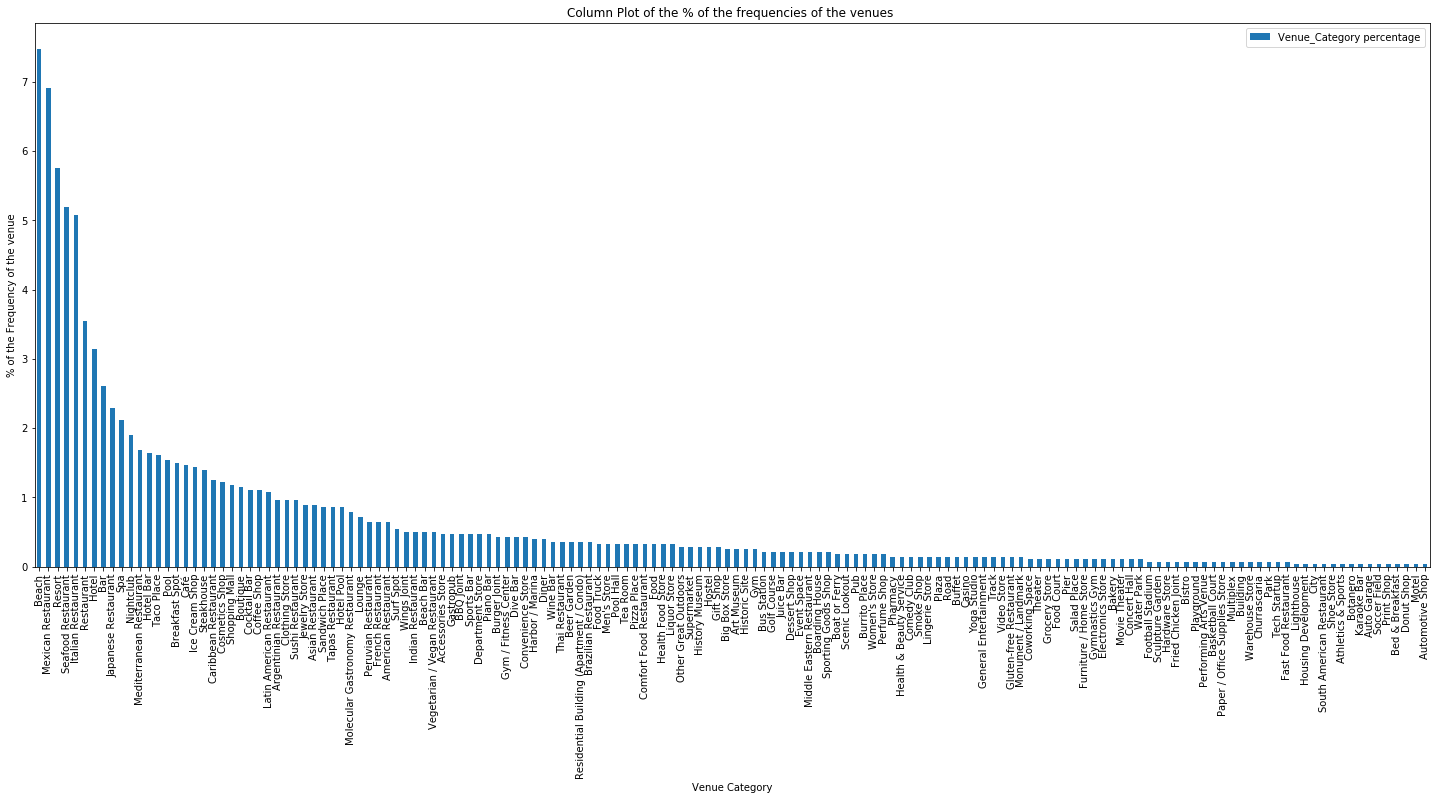

In [35]:
ax=df_v.plot(kind='bar', figsize=(25, 10))

plt.xlabel('Venue Category') # add to x-label to the plot
plt.ylabel('% of the Frequency of the venue') # add y-label to the plot
plt.title('Column Plot of the % of the frequencies of the venues ') # add title to the plot


plt.show()

In [36]:
# one hot encoding for venue category
TOP_encoding = pd.get_dummies(TOP_venues[['Venue_Category']], prefix="", prefix_sep="")

# add Restaurant column back to dataframe
TOP_encoding['Restaurant'] = TOP_venues['Restaurant'] 

In [37]:
#Create a list of the name of the columns, then put Restaurant column as the first one.
cols = TOP_encoding.columns.tolist()
n = int(cols.index('Restaurant'))
cols = [cols[n]] + cols[:n] + cols[n+1:]
TOP_encoding = TOP_encoding[cols]
TOP_encoding.head()

,Restaurant,Accessories Store,American Restaurant,Argentinian Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,...,Theater,Track,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Water Park,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Sakura Sunset,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Sakura Sunset,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Sakura Sunset,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Sakura Sunset,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Sakura Sunset,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
TOP_encoding.shape #examine the dataframe size

(2796, 152)

In [39]:

# one hot encoding for price level category
TOP_encoprice = pd.get_dummies(TOP_df[['Price_RgLv']], prefix="", prefix_sep="")

# add Restaurant column back to dataframe
TOP_encoprice['Restaurant'] = TOP_df['Restaurant'] 

#Create a list of the name of the columns, then put Restaurant column as the first one.
cols = TOP_encoprice.columns.tolist()
n = int(cols.index('Restaurant'))
cols = [cols[n]] + cols[:n] + cols[n+1:]
TOP_encoprice = TOP_encoprice[cols]
TOP_encoprice.head(10)

,Restaurant,High,Medium,low
0,Sakura Sunset,1,0,0
1,Restaurante Careyes,1,0,0
2,Restaurante Benazuza,1,0,0
3,Tora Cancún,1,0,0
4,The White Box,1,0,0
5,Restaurante Chianti,1,0,0
6,Black Hole,1,0,0
7,Restaurante Condimento,0,1,0
8,Samura Japanese Cuisine & Bar,0,1,0
9,Deli Barlovento,0,0,1


In [40]:
TOP_encoprice.shape #examine the dataframe size

(100, 4)

In [41]:
#The next dataframe groupa rows by restaurant and by taking the mean of the frequency of occurrence of each category
TOP_grouped = TOP_encoding.groupby('Restaurant').mean().reset_index()
TOP_grouped.head()

,Restaurant,Accessories Store,American Restaurant,Argentinian Restaurant,Art Museum,Asian Restaurant,Athletics & Sports,Auto Garage,Automotive Shop,BBQ Joint,...,Theater,Track,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Water Park,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Agua Santa Restaurante- Bar,0.0,0.000000,0.055556,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Arrecifes - Nizuc Brazilian Restaurant/Moon Pa...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Bacoli Tratoria,0.0,0.000000,0.000000,0.033333,0.000000,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Black Hole,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.033333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Blue Gecko Cantina,0.0,0.033333,0.000000,0.033333,0.033333,0.0,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
#defined a function to sort the venues in descending order.
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [43]:
#create the new dataframe and display the top 10 venues for each restaurant.
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Restaurant']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
TOP_venues_sorted = pd.DataFrame(columns=columns)
TOP_venues_sorted['Restaurant'] = TOP_grouped['Restaurant']

for ind in np.arange(TOP_grouped.shape[0]):
    TOP_venues_sorted.iloc[ind, 1:] = return_most_common_venues(TOP_grouped.iloc[ind, :], num_top_venues)

TOP_venues_sorted.head()

,Restaurant,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agua Santa Restaurante- Bar,Italian Restaurant,Beach,Mexican Restaurant,Breakfast Spot,Spa,Sports Bar,Latin American Restaurant,Surf Spot,Resort,Seafood Restaurant
1,Arrecifes - Nizuc Brazilian Restaurant/Moon Pa...,Resort,Mexican Restaurant,Pool,Bar,Boarding House,Pub,Sushi Restaurant,Spa,Gift Shop,Beach
2,Bacoli Tratoria,Resort,Beach,Mexican Restaurant,Seafood Restaurant,Italian Restaurant,Bar,Lounge,Caribbean Restaurant,Surf Spot,Tapas Restaurant
3,Black Hole,Beach,Hotel,Resort,Molecular Gastronomy Restaurant,Mexican Restaurant,Italian Restaurant,Hotel Bar,Tapas Restaurant,Coffee Shop,Pool
4,Blue Gecko Cantina,Beach,Mexican Restaurant,Buffet,Seafood Restaurant,Hotel,Italian Restaurant,Tapas Restaurant,Breakfast Spot,Brazilian Restaurant,Casino


The dataframe from below  merge all the categories after the conversion from letters to one and zeros.

In [44]:
TOP_predata=TOP_df
TOP_predata= TOP_predata.drop(TOP_predata.columns[[0, 2, 3, 4]], axis=1)
TOP_predata = TOP_predata.join(TOP_encoprice.set_index('Restaurant'), on='Restaurant') #Join restaurant categories with price level categories 
TOP_predata = TOP_predata.merge(TOP_grouped.set_index('Restaurant'), on='Restaurant',how='left') # merge the table with venues categories
TOP_predata.head()

,Restaurant,Apto para vegetarianos,Argentina,Asiática,Bar_x,Brasilera,Canadiense,Caribeña,Centroamericana,Cervecería,...,Theater,Track,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Water Park,Wine Bar,Wings Joint,Women's Store,Yoga Studio
0,Sakura Sunset,1,0,1,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
1,Restaurante Careyes,0,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
2,Restaurante Benazuza,1,0,0,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
3,Tora Cancún,1,0,1,0,0,0,0,0,0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
4,The White Box,1,0,0,0,0,0,0,0,0,...,0.033333,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.033333


In [45]:
TOP_predata.shape#examine the dataframe size

(100, 191)

In [46]:
X = TOP_predata.drop('Restaurant', 1)
distorsions = []
for k in range(2, 50):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions.append(kmeans.inertia_)
#avg distance cnetroid


Text(0.5, 1.0, 'Elbow curve')

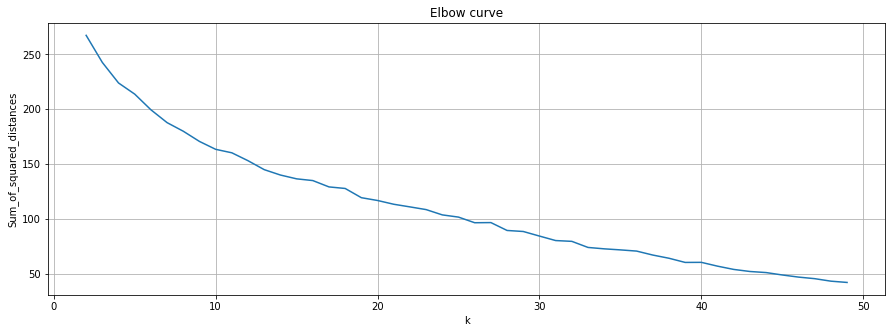

In [47]:
# Let's plot the elbow curve from 2 to 50
fig = plt.figure(figsize=(15,5))
plt.plot(range(2, 50), distorsions)
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow curve')

In [50]:
# Let's plot the elbow curve with a range from 2 to 10
distorsions2 = []
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    distorsions2.append(kmeans.inertia_)

Text(0.5, 1.0, 'Elbow curve')

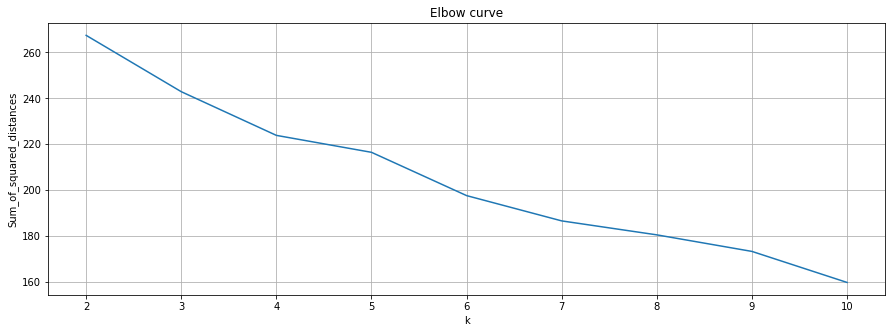

In [51]:
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 11), distorsions2)
plt.grid(True)
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow curve')

ML alghoritm-----------------------------

In [52]:
# set number of clusters
kclusters = 7
TOP_grouped_clustering = X

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(TOP_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 3, 6, 0, 3, 3, 6, 4, 0, 5], dtype=int32)

In [53]:
TOP_results=TOP_dfvres #Obtain main table without restaurant categories
TOP_results.head()

,Top,Restaurant,Longitude,Latitude,Price_RgLv,Category
0,1,Sakura Sunset,21.053990,-86.781944,High,"Japonesa, Peruana, Mariscos, Asiática, Fusión,..."
1,2,Restaurante Careyes,21.083757,-86.772370,High,"Fusión, Mariscos, Apto para vegetarianos, Opci..."
2,3,Restaurante Benazuza,21.078350,-86.774950,High,"Apto para vegetarianos, Opciones veganas, Opci..."
3,4,Tora Cancún,21.086130,-86.773790,High,"Japonesa, Mariscos, Internacional, Sushi, Asiá..."
4,5,The White Box,21.144170,-86.785180,High,"Mariscos, Apto para vegetarianos, Opciones veg..."


In [54]:

#The code below inside this block only has to be run one time, if not it will appear an error
# add clustering labels
TOP_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)
# add venues categories in descnding order
TOP_results = TOP_results.join(TOP_venues_sorted.set_index('Restaurant'), on='Restaurant')
TOP_results.head(10) 

,Top,Restaurant,Longitude,Latitude,Price_RgLv,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1,Sakura Sunset,21.053990,-86.781944,High,"Japonesa, Peruana, Mariscos, Asiática, Fusión,...",3,Beach,Hotel,Resort,Molecular Gastronomy Restaurant,Mexican Restaurant,Italian Restaurant,Hotel Bar,Tapas Restaurant,Coffee Shop,Pool
1,2,Restaurante Careyes,21.083757,-86.772370,High,"Fusión, Mariscos, Apto para vegetarianos, Opci...",4,Resort,Mexican Restaurant,Latin American Restaurant,Pool,Italian Restaurant,Beach,Beach Bar,Cocktail Bar,Other Great Outdoors,Nightclub
2,3,Restaurante Benazuza,21.078350,-86.774950,High,"Apto para vegetarianos, Opciones veganas, Opci...",2,Beach,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Bar,Hotel Bar,Lounge,Food,Event Space,Gastropub
3,4,Tora Cancún,21.086130,-86.773790,High,"Japonesa, Mariscos, Internacional, Sushi, Asiá...",0,Latin American Restaurant,Resort,Italian Restaurant,Pool,Mexican Restaurant,Seafood Restaurant,Beach,Sushi Restaurant,Other Great Outdoors,Cocktail Bar
4,5,The White Box,21.144170,-86.785180,High,"Mariscos, Apto para vegetarianos, Opciones veg...",0,Mexican Restaurant,Beach,Resort,Boat or Ferry,Hotel,Yoga Studio,Steakhouse,Bar,Beach Bar,Food Court
5,6,Restaurante Chianti,21.114496,-86.758980,High,"Italiana, Apto para vegetarianos, Opciones veg...",1,Resort,Beach,Hotel,Italian Restaurant,Asian Restaurant,Mexican Restaurant,Spa,Sports Bar,Hotel Bar,Jewelry Store
6,7,Black Hole,21.053759,-86.781610,High,"Fusión, Opciones sin gluten",0,Beach,Hotel,Resort,Molecular Gastronomy Restaurant,Mexican Restaurant,Italian Restaurant,Hotel Bar,Tapas Restaurant,Coffee Shop,Pool
7,8,Restaurante Condimento,21.073288,-86.775760,Medium,"Internacional, Mexicana, Japonesa, Mediterráne...",6,Resort,Beach,Mexican Restaurant,Seafood Restaurant,Italian Restaurant,Taco Place,Bar,Caribbean Restaurant,Pool,Surf Spot
8,9,Samura Japanese Cuisine & Bar,21.144915,-86.829605,Medium,"Japonesa, Sushi, Asiática, Mariscos, Internaci...",3,Café,Convenience Store,Mediterranean Restaurant,Italian Restaurant,Breakfast Spot,Seafood Restaurant,Supermarket,Sushi Restaurant,Caribbean Restaurant,Ice Cream Shop
9,10,Deli Barlovento,21.143953,-86.790535,low,"Mexicana, Comida rápida",3,Resort,Mexican Restaurant,Hotel,Beach,Boat or Ferry,Yoga Studio,Bar,Beach Bar,Coffee Shop,Convenience Store


In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for top, lat, lon, poi, cluster in zip(TOP_results['Top'], TOP_results['Latitude'], TOP_results['Longitude'], TOP_results['Restaurant'], TOP_results['Cluster Labels']):
    label = folium.Popup(' TOP #' + str(top) + ' ' + str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lon, lat],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

EXAMINE EACH CLUSTER

Examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster.

In [56]:
TOP_results.loc[TOP_results['Cluster Labels'] == 0, TOP_results.columns[[1,4] + list(range(5, TOP_results.shape[1]))]]

,Restaurant,Price_RgLv,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Tora Cancún,High,"Japonesa, Mariscos, Internacional, Sushi, Asiá...",0,Latin American Restaurant,Resort,Italian Restaurant,Pool,Mexican Restaurant,Seafood Restaurant,Beach,Sushi Restaurant,Other Great Outdoors,Cocktail Bar
4,The White Box,High,"Mariscos, Apto para vegetarianos, Opciones veg...",0,Mexican Restaurant,Beach,Resort,Boat or Ferry,Hotel,Yoga Studio,Steakhouse,Bar,Beach Bar,Food Court
6,Black Hole,High,"Fusión, Opciones sin gluten",0,Beach,Hotel,Resort,Molecular Gastronomy Restaurant,Mexican Restaurant,Italian Restaurant,Hotel Bar,Tapas Restaurant,Coffee Shop,Pool
26,DU MEXIQUE By Sonya Grimond,High,"Mexicana, Francesa, Apto para vegetarianos, Op...",0,Breakfast Spot,Seafood Restaurant,Italian Restaurant,Japanese Restaurant,Taco Place,Health Food Store,Comfort Food Restaurant,Coffee Shop,Cocktail Bar,Health & Beauty Service
37,Agua Santa Restaurante- Bar,Medium,"Italiana, Pizzería, Mariscos, Internacional, F...",0,Italian Restaurant,Beach,Mexican Restaurant,Breakfast Spot,Spa,Sports Bar,Latin American Restaurant,Surf Spot,Resort,Seafood Restaurant
99,Calypso´s Mexican Restaurant,Medium,"Mexicana, Latina, Mariscos, Apto para vegetari...",0,Beach,Nightclub,Bar,Ice Cream Shop,Japanese Restaurant,Mexican Restaurant,Sandwich Place,Resort,Spa,Bus Station


In [57]:
map_cun1 = folium.Map(location=[latitude, longitude], zoom_start=11)
TOP_clust=TOP_results.loc[TOP_results['Cluster Labels'] == 0, TOP_results.columns[[0,1,2,3,4] + list(range(5, TOP_results.shape[1]))]]
    
for lat, lng, Restaurant, Price_cat, Top,CLUS in zip(TOP_clust['Latitude'], TOP_clust['Longitude'], TOP_clust['Restaurant'], TOP_clust['Price_RgLv'], TOP_clust['Top'],TOP_clust['Cluster Labels']):
    label = '{}, {}, {}, Cluster {}'.format(Top, Restaurant, Price_cat,CLUS )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lng, lat],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cun1)
map_cun1
    



In [58]:
TOP_results.loc[TOP_results['Cluster Labels'] == 1, TOP_results.columns[[1,4] + list(range(5, TOP_results.shape[1]))]]

,Restaurant,Price_RgLv,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Restaurante Chianti,High,"Italiana, Apto para vegetarianos, Opciones veg...",1,Resort,Beach,Hotel,Italian Restaurant,Asian Restaurant,Mexican Restaurant,Spa,Sports Bar,Hotel Bar,Jewelry Store
33,Harry's,High,"Mariscos, Churrasquería, Contemporánea, Apto p...",1,Beach,Mediterranean Restaurant,Resort,Mexican Restaurant,Hotel,Japanese Restaurant,Hotel Bar,Seafood Restaurant,Spa,Molecular Gastronomy Restaurant
55,RESTAURANTE NAVIOS,Medium,"Mexicana, Caribeña, Mariscos, Apto para vegeta...",1,Hotel,Resort,Seafood Restaurant,Bar,Beach,Mexican Restaurant,Sushi Restaurant,Mediterranean Restaurant,Burger Joint,Middle Eastern Restaurant
58,Vegan Planet,Medium,"Mexicana, Internacional, Apto para vegetariano...",1,Taco Place,Italian Restaurant,Shopping Mall,Seafood Restaurant,Boutique,Clothing Store,Fried Chicken Joint,Pizza Place,Mexican Restaurant,Yoga Studio
65,Naos Restaurant,Medium,"Mexicana, Estadounidense, Apto para vegetarian...",1,Resort,Mexican Restaurant,Beach,Latin American Restaurant,Pool,Italian Restaurant,Tapas Restaurant,Food,Spa,Japanese Restaurant


In [59]:
map_cun1 = folium.Map(location=[latitude, longitude], zoom_start=11)
TOP_clust=TOP_results.loc[TOP_results['Cluster Labels'] == 1, TOP_results.columns[[0,1,2,3,4] + list(range(5, TOP_results.shape[1]))]]
    
for lat, lng, Restaurant, Price_cat, Top,CLUS in zip(TOP_clust['Latitude'], TOP_clust['Longitude'], TOP_clust['Restaurant'], TOP_clust['Price_RgLv'], TOP_clust['Top'],TOP_clust['Cluster Labels']):
    label = '{}, {}, {}, Cluster {}'.format(Top, Restaurant, Price_cat,CLUS )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lng, lat],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cun1)
map_cun1

In [60]:
TOP_results.loc[TOP_results['Cluster Labels'] == 2, TOP_results.columns[[1,4] + list(range(5, TOP_results.shape[1]))]]

,Restaurant,Price_RgLv,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
2,Restaurante Benazuza,High,"Apto para vegetarianos, Opciones veganas, Opci...",2,Beach,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Bar,Hotel Bar,Lounge,Food,Event Space,Gastropub
12,Rosa Negra,High,Mexicana,2,Resort,Italian Restaurant,Seafood Restaurant,Mexican Restaurant,Latin American Restaurant,Pool,Tapas Restaurant,Food,Spa,Japanese Restaurant
16,Flamingos Seafood Kitchen,Medium,"Mexicana, Caribeña, Latina, Mariscos, Apto par...",2,Coffee Shop,Bed & Breakfast,Seafood Restaurant,Bar,French Restaurant,Food Truck,Food Court,Food,Fast Food Restaurant,Event Space
19,Maki Taco,Medium,"Mexicana, Japonesa, Sushi, Asiática, Apto para...",2,Beach,Seafood Restaurant,Italian Restaurant,Mexican Restaurant,Bar,Hotel Bar,Breakfast Spot,Lounge,Food,Resort
29,Casitas,High,"Mariscos, Contemporánea, Apto para vegetariano...",2,Beach,Mediterranean Restaurant,Resort,Mexican Restaurant,Japanese Restaurant,Italian Restaurant,Hotel Bar,Seafood Restaurant,Spa,Molecular Gastronomy Restaurant
38,Pina Colada Restaurant,Medium,"Mexicana, Mariscos, Apto para vegetarianos, Op...",2,Beach,Seafood Restaurant,Resort,Mexican Restaurant,Italian Restaurant,Bar,Lounge,Event Space,Gastropub,Surf Spot
39,El Granero Grill & Drinks,low,"Mexicana, Bar, Apto para vegetarianos, Opcione...",2,Nightclub,Beach,Bar,Mexican Restaurant,Japanese Restaurant,American Restaurant,Big Box Store,Clothing Store,Ice Cream Shop,Sandwich Place
45,Chic Cabaret & Restaurant Costa Mujeres,High,"Internacional, Fusión",2,Hotel,Hotel Bar,Italian Restaurant,Spa,Seafood Restaurant,Beach,Japanese Restaurant,Gym,French Restaurant,Dessert Shop
46,Locanda Paolo,High,"Italiana, Mariscos, Europea, Fusión, Apto para...",2,Italian Restaurant,Breakfast Spot,Health Food Store,Seafood Restaurant,Taco Place,Health & Beauty Service,Japanese Restaurant,Cosmetics Shop,Coffee Shop,Diner
56,Secrets The Vine Cancun,High,"Bar, Mariscos, Apto para vegetarianos, Opcione...",2,Beach,Resort,Mediterranean Restaurant,Japanese Restaurant,Hotel,Mexican Restaurant,Spa,Hotel Bar,Piano Bar,Caribbean Restaurant


In [61]:
map_cun1 = folium.Map(location=[latitude, longitude], zoom_start=11)
TOP_clust=TOP_results.loc[TOP_results['Cluster Labels'] == 2, TOP_results.columns[[0,1,2,3,4] + list(range(5, TOP_results.shape[1]))]]
    
for lat, lng, Restaurant, Price_cat, Top,CLUS in zip(TOP_clust['Latitude'], TOP_clust['Longitude'], TOP_clust['Restaurant'], TOP_clust['Price_RgLv'], TOP_clust['Top'],TOP_clust['Cluster Labels']):
    label = '{}, {}, {}, Cluster {}'.format(Top, Restaurant, Price_cat,CLUS )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lng, lat],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cun1)
map_cun1

In [62]:
TOP_results.loc[TOP_results['Cluster Labels'] == 3, TOP_results.columns[[1,4] + list(range(5, TOP_results.shape[1]))]]

,Restaurant,Price_RgLv,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Sakura Sunset,High,"Japonesa, Peruana, Mariscos, Asiática, Fusión,...",3,Beach,Hotel,Resort,Molecular Gastronomy Restaurant,Mexican Restaurant,Italian Restaurant,Hotel Bar,Tapas Restaurant,Coffee Shop,Pool
8,Samura Japanese Cuisine & Bar,Medium,"Japonesa, Sushi, Asiática, Mariscos, Internaci...",3,Café,Convenience Store,Mediterranean Restaurant,Italian Restaurant,Breakfast Spot,Seafood Restaurant,Supermarket,Sushi Restaurant,Caribbean Restaurant,Ice Cream Shop
9,Deli Barlovento,low,"Mexicana, Comida rápida",3,Resort,Mexican Restaurant,Hotel,Beach,Boat or Ferry,Yoga Studio,Bar,Beach Bar,Coffee Shop,Convenience Store
17,Les Cepages Restaurant,High,"Francesa, Europea, Contemporánea, Internaciona...",3,Café,Seafood Restaurant,Ice Cream Shop,Fast Food Restaurant,Sandwich Place,Convenience Store,Soccer Field,Paper / Office Supplies Store,Caribbean Restaurant,Bakery
21,Crab House Cancún,High,"Mariscos, Internacional, Parrilla, Sopas, Apto...",3,Italian Restaurant,Latin American Restaurant,Resort,Hotel,Mexican Restaurant,Seafood Restaurant,Hotel Bar,Beach Bar,Japanese Restaurant,Mediterranean Restaurant
30,Bovino's Churrascaría,High,"Brasilera, Internacional, Apto para vegetarian...",3,Seafood Restaurant,Mexican Restaurant,Gym / Fitness Center,Juice Bar,Performing Arts Venue,Taco Place,Sandwich Place,Building,Lounge,Football Stadium
32,MB Restaurant,High,"Estadounidense, Mariscos, Apto para vegetarian...",3,Beach,Boutique,Argentinian Restaurant,Seafood Restaurant,Shopping Mall,Pool,Accessories Store,Resort,Burger Joint,Men's Store
52,Arrecifes - Nizuc Brazilian Restaurant/Moon Pa...,High,"Churrasquería, Brasilera, Opciones sin gluten",3,Resort,Mexican Restaurant,Pool,Bar,Boarding House,Pub,Sushi Restaurant,Spa,Gift Shop,Beach
57,Nebbiolo Ristorante,High,"Italiana, Apto para vegetarianos, Opciones veg...",3,Beach,Resort,Mediterranean Restaurant,Japanese Restaurant,Hotel,Mexican Restaurant,Spa,Hotel Bar,Piano Bar,Caribbean Restaurant
67,La Fonda Del Zancudo,Medium,"Apto para vegetarianos, Opciones veganas",3,Breakfast Spot,Seafood Restaurant,Mexican Restaurant,Japanese Restaurant,Sushi Restaurant,Taco Place,Hotel Bar,Bar,Cocktail Bar,Health & Beauty Service


In [63]:
map_cun1 = folium.Map(location=[latitude, longitude], zoom_start=11)
TOP_clust=TOP_results.loc[TOP_results['Cluster Labels'] == 3, TOP_results.columns[[0,1,2,3,4] + list(range(5, TOP_results.shape[1]))]]
    
for lat, lng, Restaurant, Price_cat, Top,CLUS in zip(TOP_clust['Latitude'], TOP_clust['Longitude'], TOP_clust['Restaurant'], TOP_clust['Price_RgLv'], TOP_clust['Top'],TOP_clust['Cluster Labels']):
    label = '{}, {}, {}, Cluster {}'.format(Top, Restaurant, Price_cat,CLUS )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lng, lat],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cun1)
map_cun1

In [45]:
TOP_results.loc[TOP_results['Cluster Labels'] == 4, TOP_results.columns[[1,4] + list(range(5, TOP_results.shape[1]))]]

,Restaurant,Price_RgLv,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Restaurante Careyes,High,"Fusión, Mariscos, Apto para vegetarianos, Opci...",4,Resort,Mexican Restaurant,Pool,Latin American Restaurant,Italian Restaurant,Beach,Japanese Restaurant,Spa,Cocktail Bar,Other Great Outdoors
14,Taqueria Coapeñitos,low,"Mexicana, Comida rápida, Latina, Apto para veg...",4,Seafood Restaurant,Taco Place,Hotel,French Restaurant,Park,Donut Shop,Sushi Restaurant,Sandwich Place,Japanese Restaurant,Italian Restaurant
20,Chuchito Pérez Cancun,Medium,"Mexicana, Cervecería, Latina, Contemporánea, A...",4,Nightclub,Beach,Mexican Restaurant,Bar,American Restaurant,Japanese Restaurant,Big Box Store,Wings Joint,Hotel,Clothing Store
22,The Bears Den International Kitchen,Medium,"Mexicana, Internacional, Fusión, Canadiense, A...",4,Italian Restaurant,Mexican Restaurant,Caribbean Restaurant,Ice Cream Shop,Breakfast Spot,Shopping Mall,Brazilian Restaurant,Boutique,South American Restaurant,Spa
23,The Club Grill,High,"Internacional, Apto para vegetarianos, Opcione...",4,Beach,Mediterranean Restaurant,Resort,Japanese Restaurant,Mexican Restaurant,Italian Restaurant,Breakfast Spot,Molecular Gastronomy Restaurant,Café,Peruvian Restaurant
24,Cancun Lighthouse Marina,Medium,"Mexicana, Internacional, Apto para vegetariano...",4,Cosmetics Shop,Accessories Store,Shopping Mall,Ice Cream Shop,Coffee Shop,Lingerie Store,Indian Restaurant,Department Store,Dessert Shop,Clothing Store
27,Tempo by Martin Berasategui,High,"Europea, Española, Apto para vegetarianos, Opc...",4,Resort,Mexican Restaurant,Italian Restaurant,Latin American Restaurant,Pool,Beach,Cocktail Bar,Beach Bar,Japanese Restaurant,Mediterranean Restaurant
28,Ruth's Chris Steak House Cancún,High,"Estadounidense, Churrasquería, Apto para veget...",4,Mexican Restaurant,Ice Cream Shop,Jewelry Store,Hotel,Seafood Restaurant,Shopping Mall,Boutique,Peruvian Restaurant,Mediterranean Restaurant,Smoke Shop
31,Rino's Pizza Time,Medium,"Italiana, Pizzería, Apto para vegetarianos, Op...",4,Italian Restaurant,Breakfast Spot,Health Food Store,Café,Seafood Restaurant,Food Truck,Bar,Supermarket,Comfort Food Restaurant,Coworking Space
34,Hacienda Sisal,Medium,"Mexicana, Latina, Centroamericana, Apto para v...",4,Boutique,Mexican Restaurant,Hotel,Ice Cream Shop,Italian Restaurant,Beach,Jewelry Store,Latin American Restaurant,Cosmetics Shop,Comedy Club


In [64]:
map_cun1 = folium.Map(location=[latitude, longitude], zoom_start=11)
TOP_clust=TOP_results.loc[TOP_results['Cluster Labels'] == 4, TOP_results.columns[[0,1,2,3,4] + list(range(5, TOP_results.shape[1]))]]
    
for lat, lng, Restaurant, Price_cat, Top,CLUS in zip(TOP_clust['Latitude'], TOP_clust['Longitude'], TOP_clust['Restaurant'], TOP_clust['Price_RgLv'], TOP_clust['Top'],TOP_clust['Cluster Labels']):
    label = '{}, {}, {}, Cluster {}'.format(Top, Restaurant, Price_cat,CLUS )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lng, lat],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cun1)
map_cun1

In [65]:
TOP_results.loc[TOP_results['Cluster Labels'] == 5, TOP_results.columns[[1,4] + list(range(5, TOP_results.shape[1]))]]

,Restaurant,Price_RgLv,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
10,Peter's Restaurante,Medium,"Europea, Internacional, Apto para vegetarianos...",5,Italian Restaurant,Breakfast Spot,Seafood Restaurant,Bar,Health Food Store,Road,Food Truck,French Restaurant,Monument / Landmark,Café
15,La Dolce Vita centro,Medium,"Italiana, Europea, Apto para vegetarianos, Opc...",5,Italian Restaurant,Food Truck,Breakfast Spot,Café,Monument / Landmark,Bar,Health Food Store,Brazilian Restaurant,Road,Spa
47,Lorenzillo's Restaurant,High,"Mariscos, Sopas, Apto para vegetarianos, Opcio...",5,Italian Restaurant,Seafood Restaurant,Asian Restaurant,Hotel,Hotel Pool,Steakhouse,Café,Beach,Mexican Restaurant,Gastropub
48,Cenacolo Puerto Cancún,Medium,"Italiana, Europea, Apto para vegetarianos, Opc...",5,Clothing Store,Movie Theater,Coffee Shop,Ice Cream Shop,Jewelry Store,Nightclub,Electronics Store,Road,Food Court,Boutique
49,Cambalache Cancun,High,"Churrasquería, Argentina, Sudamericana, Intern...",5,Cosmetics Shop,Accessories Store,Shopping Mall,Beach,Dessert Shop,Resort,Boutique,Lingerie Store,Sporting Goods Shop,Jewelry Store
73,Restaurante Fuego,High,"Peruana, Apto para vegetarianos, Opciones sin ...",5,Resort,Mexican Restaurant,Beach,Latin American Restaurant,Pool,Italian Restaurant,Tapas Restaurant,Food,Spa,Japanese Restaurant
80,La Capilla,Medium,"Estadounidense, Churrasquería, Argentina, Apto...",5,Latin American Restaurant,Resort,Hotel,Italian Restaurant,Mexican Restaurant,Seafood Restaurant,Beach,Hotel Bar,Beach Bar,Japanese Restaurant
82,Taco y Tequila Cancún,Medium,"Mexicana, Apto para vegetarianos, Opciones veg...",5,Cosmetics Shop,Accessories Store,Ice Cream Shop,Shopping Mall,Coffee Shop,Burger Joint,Boutique,Lingerie Store,Perfume Shop,Sporting Goods Shop
87,Casa Rolandi,High,"Italiana, Suiza, Mariscos",5,Italian Restaurant,Beach,Mexican Restaurant,Gym / Fitness Center,Surf Spot,Breakfast Spot,Boutique,Latin American Restaurant,Boat or Ferry,Spa
94,La Destileria Cancun,Medium,"Mexicana, Latina, Apto para vegetarianos, Opci...",5,Shopping Mall,Ice Cream Shop,Seafood Restaurant,Mexican Restaurant,Jewelry Store,Beach,Smoke Shop,Boutique,Resort,Residential Building (Apartment / Condo)


In [66]:
map_cun1 = folium.Map(location=[latitude, longitude], zoom_start=11)
TOP_clust=TOP_results.loc[TOP_results['Cluster Labels'] == 5, TOP_results.columns[[0,1,2,3,4] + list(range(5, TOP_results.shape[1]))]]
    
for lat, lng, Restaurant, Price_cat, Top,CLUS in zip(TOP_clust['Latitude'], TOP_clust['Longitude'], TOP_clust['Restaurant'], TOP_clust['Price_RgLv'], TOP_clust['Top'],TOP_clust['Cluster Labels']):
    label = '{}, {}, {}, Cluster {}'.format(Top, Restaurant, Price_cat,CLUS )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lng, lat],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cun1)
map_cun1

In [67]:
TOP_results.loc[TOP_results['Cluster Labels'] == 6, TOP_results.columns[[1,4] + list(range(5, TOP_results.shape[1]))]]

,Restaurant,Price_RgLv,Category,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,Restaurante Condimento,Medium,"Internacional, Mexicana, Japonesa, Mediterráne...",6,Resort,Beach,Mexican Restaurant,Seafood Restaurant,Italian Restaurant,Taco Place,Bar,Caribbean Restaurant,Pool,Surf Spot
11,El Rinconcito de Puebla,low,"Mexicana, Cervecería, Bar",6,Mexican Restaurant,Seafood Restaurant,Hostel,Italian Restaurant,Breakfast Spot,Pizza Place,Bar,Burrito Place,Middle Eastern Restaurant,Beer Garden
13,Bacoli Tratoria,Medium,"Italiana, Pizzería, Europea, Apto para vegetar...",6,Resort,Beach,Mexican Restaurant,Seafood Restaurant,Italian Restaurant,Bar,Lounge,Caribbean Restaurant,Surf Spot,Tapas Restaurant
18,Fantino,High,"Europea, Apto para vegetarianos, Opciones vega...",6,Beach,Mediterranean Restaurant,Resort,Mexican Restaurant,Japanese Restaurant,Hotel Bar,Seafood Restaurant,Spa,Café,Caribbean Restaurant
25,Bubba Gump Shrimp Co,Medium,"Estadounidense, Bar, Mariscos, Apto para veget...",6,Italian Restaurant,Seafood Restaurant,Resort,Café,Hotel Pool,Steakhouse,Beach,Gastropub,Lounge,Molecular Gastronomy Restaurant
35,Porfirio´s Cancún,High,"Mexicana, Latina, Contemporánea, Apto para veg...",6,Beach,Mediterranean Restaurant,Resort,Mexican Restaurant,Hotel,Japanese Restaurant,Hotel Bar,Seafood Restaurant,Spa,Molecular Gastronomy Restaurant
40,Loncheria El Pocito,low,Mexicana,6,Mexican Restaurant,Taco Place,Electronics Store,Pizza Place,Motel,Food Truck,Seafood Restaurant,Dessert Shop,Paper / Office Supplies Store,Convenience Store
41,Mextreme,Medium,"Mexicana, Latina, Bar",6,Nightclub,Bar,Beach,Mexican Restaurant,American Restaurant,Japanese Restaurant,Ice Cream Shop,Resort,Clothing Store,Sandwich Place
42,Puerto Madero Cancún,High,"Argentina, Latina, Mariscos, Parrilla, Contemp...",6,Beach,Mediterranean Restaurant,Resort,Mexican Restaurant,Japanese Restaurant,Hotel Bar,Seafood Restaurant,Spa,Caribbean Restaurant,Steakhouse
43,Siete,Medium,"Latina, Mexicana, Española, Apto para vegetari...",6,Boutique,Beach,Pool,Argentinian Restaurant,Seafood Restaurant,Shopping Mall,Tapas Restaurant,Jewelry Store,Mexican Restaurant,Burger Joint


In [68]:
map_cun1 = folium.Map(location=[latitude, longitude], zoom_start=11)
TOP_clust=TOP_results.loc[TOP_results['Cluster Labels'] == 6, TOP_results.columns[[0,1,2,3,4] + list(range(5, TOP_results.shape[1]))]]
    
for lat, lng, Restaurant, Price_cat, Top,CLUS in zip(TOP_clust['Latitude'], TOP_clust['Longitude'], TOP_clust['Restaurant'], TOP_clust['Price_RgLv'], TOP_clust['Top'],TOP_clust['Cluster Labels']):
    label = '{}, {}, {}, Cluster {}'.format(Top, Restaurant, Price_cat,CLUS )
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lng, lat],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_cun1)
map_cun1

The presented notebook was created for academic pourposes.

	References
•	Hernández L., Lopez F., Mancini P., & Rodríguez M. (May, 2018). Propuesta metodológica para el diagnóstico empresarial de las PyMES del sector “Alimentos y Bebidas” en Cancún. Academia Journals, 10(4), Tomo 9. pp: 1463-1468. Online e-book ISSN: 1946-5351. ISBN: 978-1-939982-37-7. https://drive.google.com/drive/folders/1nVmDJmY8gBjI7gKB5EywJuNYS42Ph05c

•	https://www.lajornadamaya.mx/2018-11-25/Cancun--primer-lugar-con-PIB-proveniente-del-turismo

•	http://mim.promexico.gob.mx/work/models/mim/Documentos/PDF/mim/FE_QUINTANA_ROO_vf.pdf

•	https://www.condusef.gob.mx/Revista/index.php/usuario-inteligente/educacion-financiera/492-pymes

•	https://www.tripadvisor.com.mx/Restaurants-g150807-Cancun_Yucatan_Peninsula.html#EATERY_LIST_CONTENTS

Check my GitHub repository to get the data sets and the complete report https://github.com/EmmanuelRTM/IBM_Capstone_project
